<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Preprocessing
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here

## Exploring your data

### Read raw data from file (0.25 points)

In [2]:
# YOUR CODE HERE
raw_df = pd.read_csv("../data/raw/21127635_americas.csv")

In [3]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,93763.0,48981.0,44782.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Antigua and Barbuda
1,93219.0,48709.0,44511.0,12.115,6.365,11.0,NaN,NaN,NaN,NaN,...,0.72,NaN,75.775,80.941,NaN,NaN,NaN,NaN,2021,Antigua and Barbuda
2,92664.0,48428.0,44236.0,12.160,5.961,11.0,NaN,NaN,NaN,NaN,...,0.74,NaN,76.061,81.316,NaN,NaN,NaN,NaN,2020,Antigua and Barbuda
3,92117.0,48156.0,43961.0,11.485,5.865,11.0,NaN,NaN,NaN,NaN,...,0.69,NaN,75.909,81.171,112.122238,NaN,104.976669,NaN,2019,Antigua and Barbuda
4,91626.0,47910.0,43715.0,10.816,5.787,11.0,NaN,NaN,NaN,NaN,...,0.70,NaN,75.724,81.000,112.091682,NaN,104.444443,NaN,2018,Antigua and Barbuda


### How many rows and how many columns does the raw data have? (0.25 points)

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple). **If your data has the number of rows smaller than 1000, please crawl the data once again with larger year interval**.

In [4]:
# YOUR CODE HERE
shape = raw_df.shape

In [5]:
# TEST
print(f"Current shape: {shape}")

if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

Current shape: (1204, 26)
Your data good!.


### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: Give your observation here
- Each line in the provided dataset represents a set of economic and demographic statistics in the period between 1995 and 2022 in the continents of americas. The dataset is structured with various columns representing different data points. These columns, or fields, have specific meanings.
- Yes, it matters if the lines in a dataset have different meanings or if the data columns do not align consistently. Data consistency and coherence are crucial for meaningful analysis, interpretation, and comparisons.

### Does the raw data have duplicate rows? (0.25 points)

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [9]:
# YOUR CODE HERE
index = raw_df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

In [10]:
# TEST
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


In [17]:
# De-deduplicate your raw data
# YOUR CODE HERE
tempDict = {key: [] for key in raw_df.keys()}
raw_df = raw_df.drop_duplicates(keep = 'first')

### What does each column mean? (0.25đ)

To see the meaning of each column:
- First, you need to read the file "assignment_schema.csv" into DataFrame `col_meaning_df`; you also need to make the "Query API" column an index column.
- Then, you just need to display the DataFrame `col_meaning_df` for viewing. You can use `pd.set_option` to customize the table width so that strings that are too long are not truncated.

In [20]:
# YOUR CODE HERE
col_meaning_df = pd.read_csv('../data/external/assignment_schema.csv')
col_meaning_df.set_index('Query API', inplace=True)
pd.set_option('display.max_colwidth', 350)

# raise NotImplementedError()

In [21]:
# TEST
col_meaning_df

,Meaning
Query API,
SP.POP.TOTL,Total Population
SP.POP.TOTL.FE.IN,Female Population
SP.POP.TOTL.MA.IN,Male Population
SP.DYN.CBRT.IN,Birth Rate
SP.DYN.CDRT.IN,Death Rate
SE.COM.DURS,Compulsory Education Dur
SL.IND.EMPL.ZS,Employment in Industry(%)
SL.AGR.EMPL.ZS,Employment in Agriculture(%)
SL.AGR.EMPL.FE.ZS,Female Employment in Agriculture(%)


Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing? (0.25 points)

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [22]:
# YOUR CODE HERE
dtypes = raw_df.dtypes
# raise NotImplementedError()

In [23]:
# TEST
dtypes

Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

We observe that the column `Year` has numeric type. However, its magnitude does not have a significance. And, it actually represents a period instead of a number. Thus, it can be convert to categorical type.

In [24]:
# YOUR CODE HERE
raw_df["Year"] = raw_df["Year"].astype(str)
# raise NotImplementedError()

In [25]:
# TEST
dtypes = raw_df.dtypes
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert len(float_cols) == 24
object_cols = set(dtypes[dtypes == object].index)
assert len(object_cols) == 2

### For each column with numeric data type, how are the values distributed? (1đ)

For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [27]:
# YOUR CODE HERE
num_col_info_df = raw_df.select_dtypes(exclude='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)
    # raise NotImplementedError()

def median(df):
    return (df.quantile(0.5)).round(1)
    # raise NotImplementedError()

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)
    # raise NotImplementedError()

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)
    # raise NotImplementedErrord()

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
missing_ratio,0.0,0.0,0.0,3.800,3.800,15.6,26.00000,26.000000,26.000000,26.000000,...,1.060000e+01,58.900000,6.10,55.300000,5.700,5.700,25.800000,54.90000,44.400000,74.700000
min,15101.0,7337.0,7765.0,5.900,2.800,6.0,10.38677,1.128129,0.094002,3.099745,...,3.486034e+05,23.915832,0.00,0.000000,45.758,46.251,72.597130,0.11737,46.638149,72.346718
lower_quartile,109166.0,56456.5,55542.5,13.600,5.600,9.0,18.00000,8.100000,2.400000,8.800000,...,7.631481e+07,687.600000,4.70,47.600000,67.900,73.900,100.500000,19.70000,89.900000,96.600000
median,3422497.0,1764234.5,1658095.5,17.200,6.800,12.0,20.10000,15.700000,5.400000,10.800000,...,1.085180e+09,1375.900000,14.60,73.600000,70.400,76.400,106.400000,33.30000,96.900000,98.100000
upper_quartile,11949081.0,5975354.5,5995499.0,22.100,7.900,13.0,22.70000,25.200000,9.500000,14.000000,...,4.399687e+09,2468.600000,32.20,85.400000,73.100,79.100,111.700000,54.40000,101.800000,98.900000
max,333287557.0,168266219.0,165021339.0,37.349,17.738,17.0,32.26668,52.982150,42.189880,27.820870,...,2.237237e+11,17264.736744,86.99,99.929949,80.621,85.855,148.712952,117.71994,152.806656,100.000000


Total Population                              1.091660e+05
Female Population                             5.645650e+04
Male Population                               5.554250e+04
Birth Rate                                    1.360000e+01
Death Rate                                    5.600000e+00
Compulsory Education Dur.                     9.000000e+00
Employment in Industry(%)                     1.800000e+01
Employment in Agriculture(%)                  8.100000e+00
Female Employment in Agriculture(%)           2.400000e+00
Female Employment in Industry(%)              8.800000e+00
Unemployment(%)                               5.000000e+00
GDP in USD                                    2.707147e+09
National Income per Capita                   -8.000000e-01
Net income from Abroad                       -2.275376e+09
Agriculture value added(in USD)               7.631481e+07
Electric Power Consumption(kWH per capita)    6.876000e+02
Renewable Energy Consumption (%)              4.700000e+

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\932574024.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[r][c].set_xticklabels(new_label, rotation=180+90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\932574024.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[r][c].set_xticklabels(new_label, rotation=180+90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\932574024.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[r][c].set_xticklabels(new_label, rotation=180+90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\932574024.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[r][c].set_xticklabels(new_label, rotation=180+90)


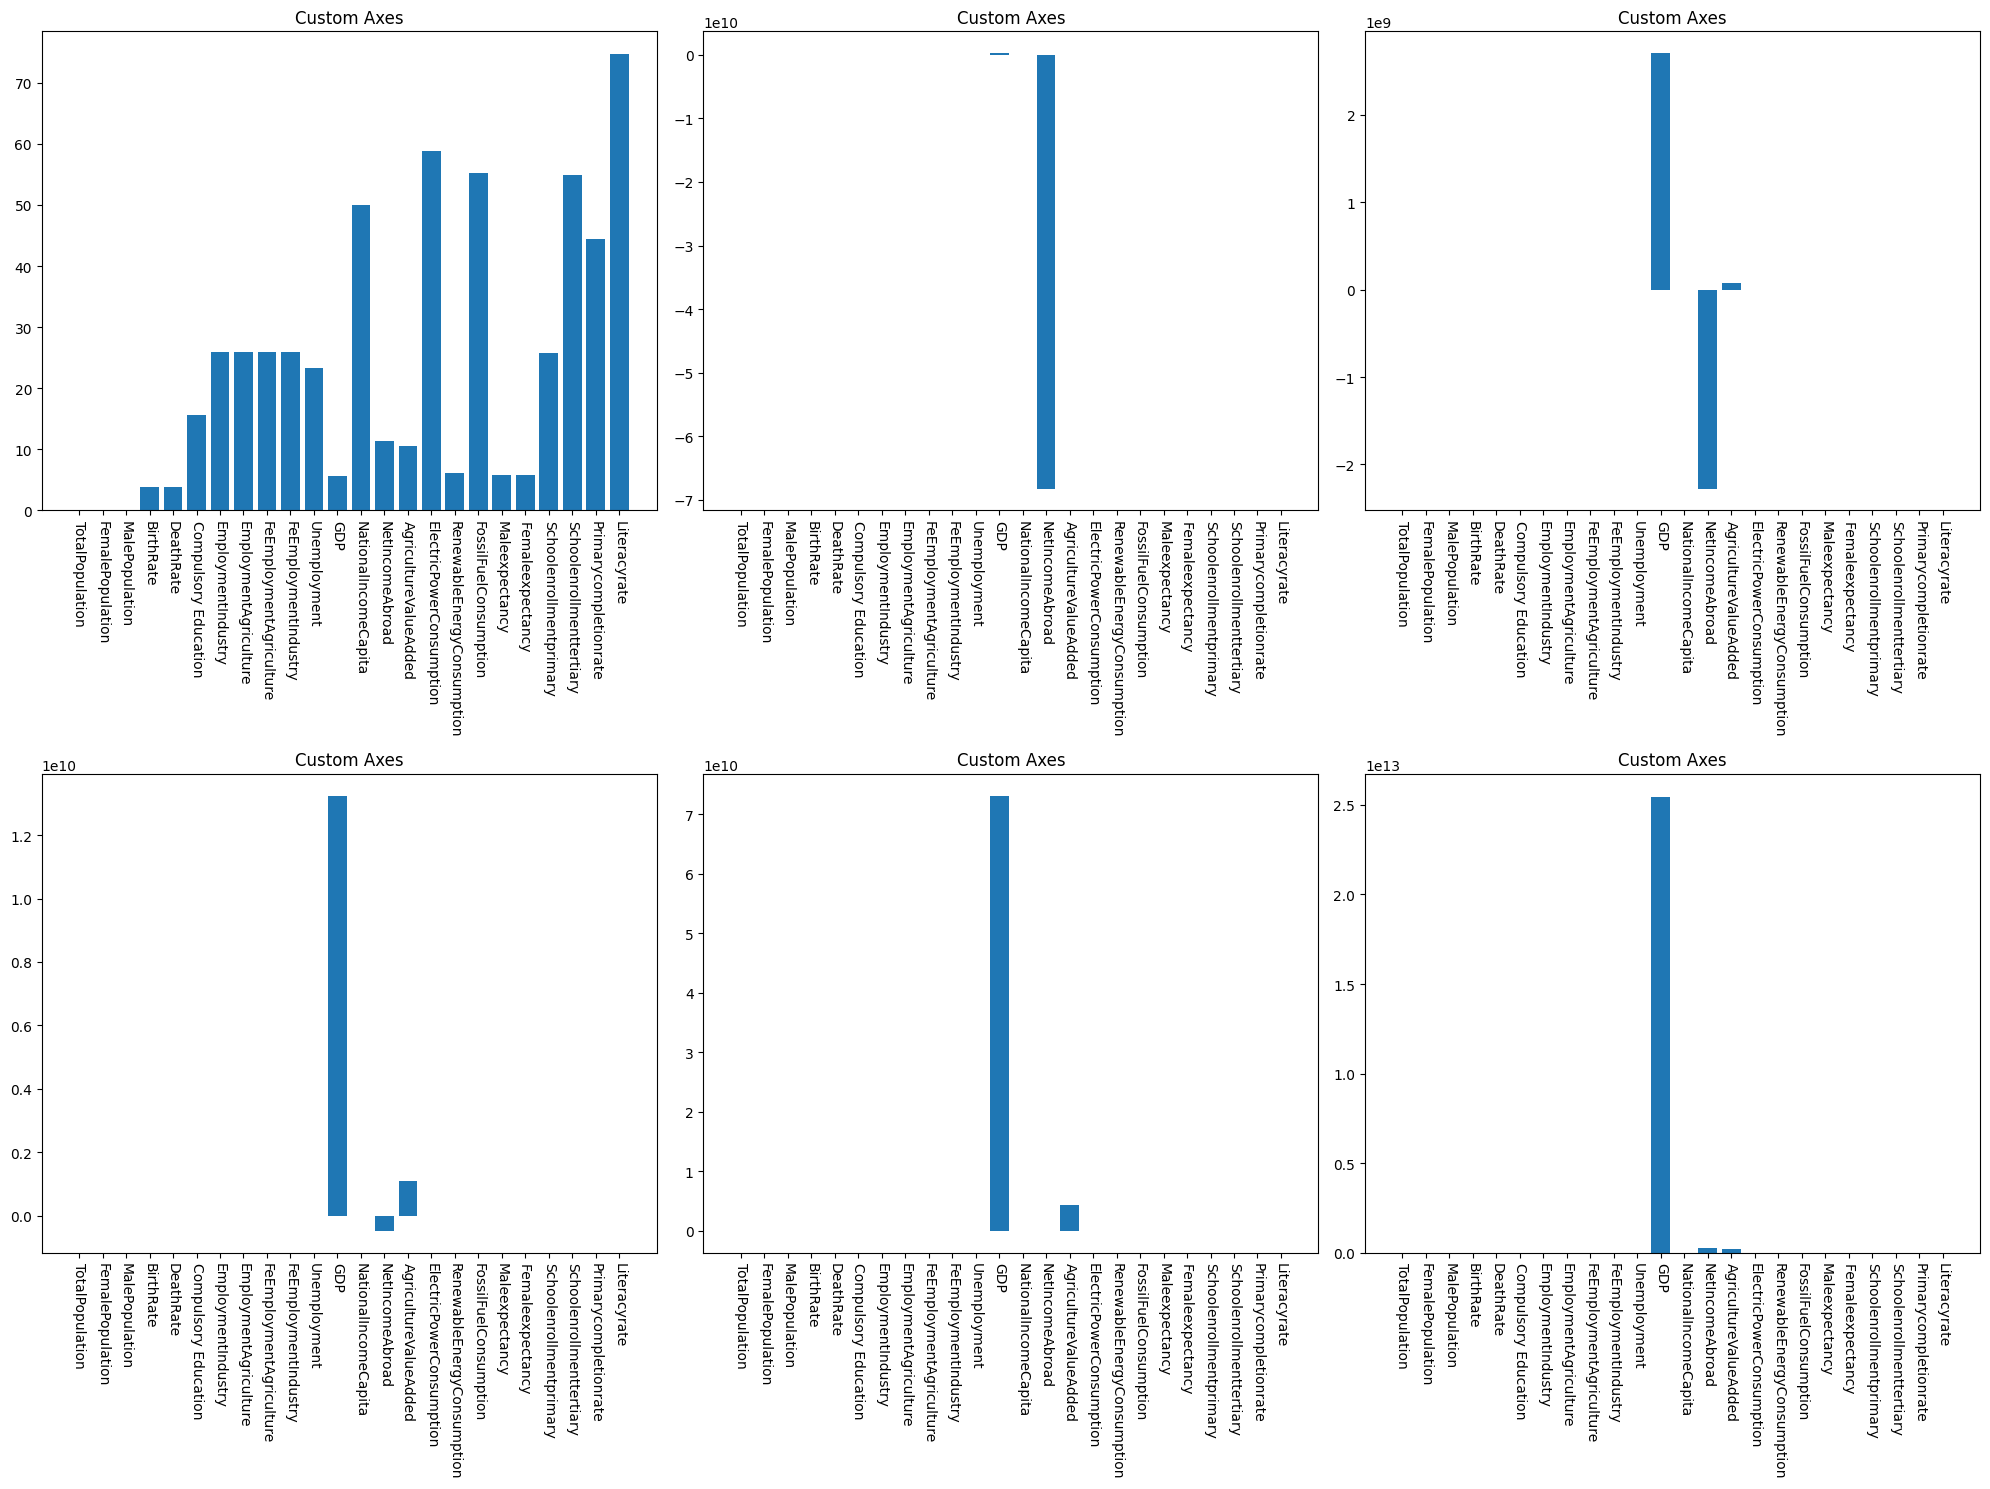

In [135]:
# YOUR CODE HERE (Optional)
# You can use Matplotlib to visualize this table for more intuitive
import matplotlib.pyplot as plt
new_label = ['TotalPopulation', 'FemalePopulation', 'MalePopulation',
       'BirthRate', 'DeathRate', 'Compulsory Education',
       'EmploymentIndustry', 'EmploymentAgriculture',
       'FeEmploymentAgriculture',
       'FeEmploymentIndustry', 'Unemployment', 'GDP',
       'NationalIncomeCapita', 'NetIncomeAbroad',
       'AgricultureValueAdded',
       'ElectricPowerConsumption',
       'RenewableEnergyConsumption', 'FossilFuelConsumption',
       'Maleexpectancy', 'Femaleexpectancy ',
       'Schoolenrollmentprimary', 'Schoolenrollmenttertiary',
       'Primarycompletionrate', 'Literacyrate']
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize =(nrows*10,ncols*5)) 
i=0
for r in range(0,nrows):
    for c in range(0,ncols):
        x = num_col_info_df.keys()
        y = num_col_info_df.iloc[i][:]
        i+=1
        ax[r][c].bar(x,y)
        ax[r][c].set_xticklabels(new_label, rotation=180+90)
        ax[r][c].figure.tight_layout()
        ax[r][c].set_title('Custom Axes')

fig.tight_layout()

In [28]:
# TEST
assert num_col_info_df["Total Population"]["missing_ratio"] == 0

In [29]:
dict(num_col_info_df.iloc[0])

{'Total Population': 0.0,
 'Female Population': 0.0,
 'Male Population': 0.0,
 'Birth Rate': 3.8,
 'Death Rate': 3.8,
 'Compulsory Education Dur.': 15.6,
 'Employment in Industry(%)': 26.0,
 'Employment in Agriculture(%)': 26.0,
 'Female Employment in Agriculture(%)': 26.0,
 'Female Employment in Industry(%)': 26.0,
 'Unemployment(%)': 23.3,
 'GDP in USD': 5.6,
 'National Income per Capita': 50.0,
 'Net income from Abroad': 11.4,
 'Agriculture value added(in USD)': 10.6,
 'Electric Power Consumption(kWH per capita)': 58.9,
 'Renewable Energy Consumption (%)': 6.1,
 'Fossil Fuel Consumption (%)': 55.3,
 'Male life expectancy': 5.7,
 'Female life expectancy ': 5.7,
 'School enrollment, primary': 25.8,
 'School enrollment, tertiary': 54.9,
 'Primary completion rate': 44.4,
 'Literacy rate': 74.7}

After identifying the basic statistical numbers that describe your data, we further need to determine the features that have a large number of missing values. Such features are not useful for the analysis stage and must be removed from the dataset.

Depending on your goals, the threshold for "large" can be defined. Usually, if the percentage of missing values is greater than 75%, the column is dropped from the dataframe and an updated dataframe is returned.

In [136]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    """Drop missing features from Pandas dataframe base on given threshold.

    Args:
        df (pd.DataFrame): Input dataframe for processing.
        missing_lst (dict, optional): Dict missing value rate which calculated from previous stage. Defaults to dict(num_col_info_df.iloc[0]).
        threshold (float, optional): User threshold for dropping. Defaults to 75.0.

    Returns:
        pd.DataFrame: Updated dataframe
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped column(s): " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no column(s) to trim.")
        
    return df_cp

In [137]:
raw_df = drop_missing_features(raw_df, dict(num_col_info_df.iloc[0]))

[LOG] Have no column(s) to trim.


In [138]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,93763.0,48981.0,44782.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Antigua and Barbuda
1,93219.0,48709.0,44511.0,12.115,6.365,11.0,NaN,NaN,NaN,NaN,...,0.72,NaN,75.775,80.941,NaN,NaN,NaN,NaN,2021,Antigua and Barbuda
2,92664.0,48428.0,44236.0,12.160,5.961,11.0,NaN,NaN,NaN,NaN,...,0.74,NaN,76.061,81.316,NaN,NaN,NaN,NaN,2020,Antigua and Barbuda
3,92117.0,48156.0,43961.0,11.485,5.865,11.0,NaN,NaN,NaN,NaN,...,0.69,NaN,75.909,81.171,112.122238,NaN,104.976669,NaN,2019,Antigua and Barbuda
4,91626.0,47910.0,43715.0,10.816,5.787,11.0,NaN,NaN,NaN,NaN,...,0.70,NaN,75.724,81.000,112.091682,NaN,104.444443,NaN,2018,Antigua and Barbuda


After remove features which have large missing values, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.

In [139]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    """Filling missing features from Pandas dataframe
    
    The first, you need to replace all None values with NaN, fillna only works on nans.
    
    After that, you replace all NaN values with the mean of the column values.

    Args:
        df (pd.DataFrame): Input dataframe for processing.

    Returns:
        pd.DataFrame: Updated dataframe
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    if (df is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # Get the list of columns in the dataframe
    cols_list = list(df_cp.columns)
    
    # Exclude the last column - Country, Year
    cols_list.remove("Country")
    cols_list.remove("Year")
    
    # Replace all None values with NaN, fillna only works on nans
    df_cp.fillna(value=np.nan, inplace=True)
    
    # Replace all NaN values with the mean of the column values
    for col in cols_list:
        df_cp[col].fillna((df_cp[col].mean()), inplace=True)
        
    return df_cp
    

In [140]:
raw_df = filling_missing_value(df=raw_df)

In [141]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,93763.0,48981.0,44782.0,18.184992,6.828165,11.0,20.153997,17.004881,8.655858,11.81121,...,21.149982,63.452255,70.19852,76.07276,106.128710,39.528947,95.522408,97.105964,2022,Antigua and Barbuda
1,93219.0,48709.0,44511.0,12.115000,6.365000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.720000,63.452255,75.77500,80.94100,106.128710,39.528947,95.522408,97.105964,2021,Antigua and Barbuda
2,92664.0,48428.0,44236.0,12.160000,5.961000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.740000,63.452255,76.06100,81.31600,106.128710,39.528947,95.522408,97.105964,2020,Antigua and Barbuda
3,92117.0,48156.0,43961.0,11.485000,5.865000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.690000,63.452255,75.90900,81.17100,112.122238,39.528947,104.976669,97.105964,2019,Antigua and Barbuda
4,91626.0,47910.0,43715.0,10.816000,5.787000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.700000,63.452255,75.72400,81.00000,112.091682,39.528947,104.444443,97.105964,2018,Antigua and Barbuda


In [142]:
# TEST
raw_df.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
missing_ratio,0.0,0.0,0.0,0.000,0.000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.00000,0.000000,0.000000
min,15101.0,7337.0,7765.0,5.900,2.800,6.0,10.38677,1.128129,0.094002,3.099745,...,3.486034e+05,23.915832,0.00,0.000000,45.758,46.251,72.597130,0.11737,46.638149,72.346718
lower_quartile,109166.0,56456.5,55542.5,13.800,5.600,9.0,18.70000,10.700000,3.900000,9.500000,...,1.035674e+08,1868.900000,5.20,63.500000,68.200,74.100,102.400000,37.80000,95.500000,97.100000
median,3422497.0,1764234.5,1658095.5,17.600,6.800,11.0,20.20000,17.000000,8.300000,11.800000,...,1.505479e+09,2620.200000,16.70,63.500000,70.200,76.200,106.100000,39.50000,95.500000,97.100000
upper_quartile,11949081.0,5975354.5,5995499.0,22.000,7.800,12.0,21.90000,19.700000,8.700000,12.400000,...,9.465944e+09,2620.200000,31.40,69.800000,73.000,78.900,109.800000,39.50000,97.900000,97.100000
max,333287557.0,168266219.0,165021339.0,37.349,17.738,17.0,32.26668,52.982150,42.189880,27.820870,...,2.237237e+11,17264.736744,86.99,99.929949,80.621,85.855,148.712952,117.71994,152.806656,100.000000


### For each column with a non-numeric data type, how are the values distributed?(1đ)

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types. (Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà có kiểu là categorical, nó là một tập hợp có số lượng hữu hạn các loại. Việc đếm trực tiếp số lượng các giá trị trong những cột này không có nhiều ý nghĩa, nên tốt hơn hết là mà sẽ đếm số lượng phần tử các loại.)
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

Hint: you might want to use it [`explode` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html).

In [150]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [144]:
# YOUR CODE HERE
cat_col_info_df = raw_df.select_dtypes(include='object')

def missing_ratio(s):
    # raise NotImplementedError()
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    # raise NotImplementedError()
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    # raise NotImplementedError()
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Year,Country
missing_ratio,0.0,0.0
num_values,28,43
value_ratios,"{'2022': 3.6, '2021': 3.6, '1996': 3.6, '1997': 3.6, '1998': 3.6, '1999': 3.6, '2000': 3.6, '200...","{'Antigua and Barbuda': 2.3, 'Puerto Rico': 2.3, 'Haiti': 2.3, 'Honduras': 2.3, 'Jamaica': 2.3, ..."


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\3059694774.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Year = cat_col_info_df.iloc[2][0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\3059694774.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Country = cat_col_info_df.iloc[2][1]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\3059694774.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(Year.keys(), rotation=45)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22084\3059694774.py:15: UserWarning: 

Text(0.5, 1.0, 'Country Categorical')

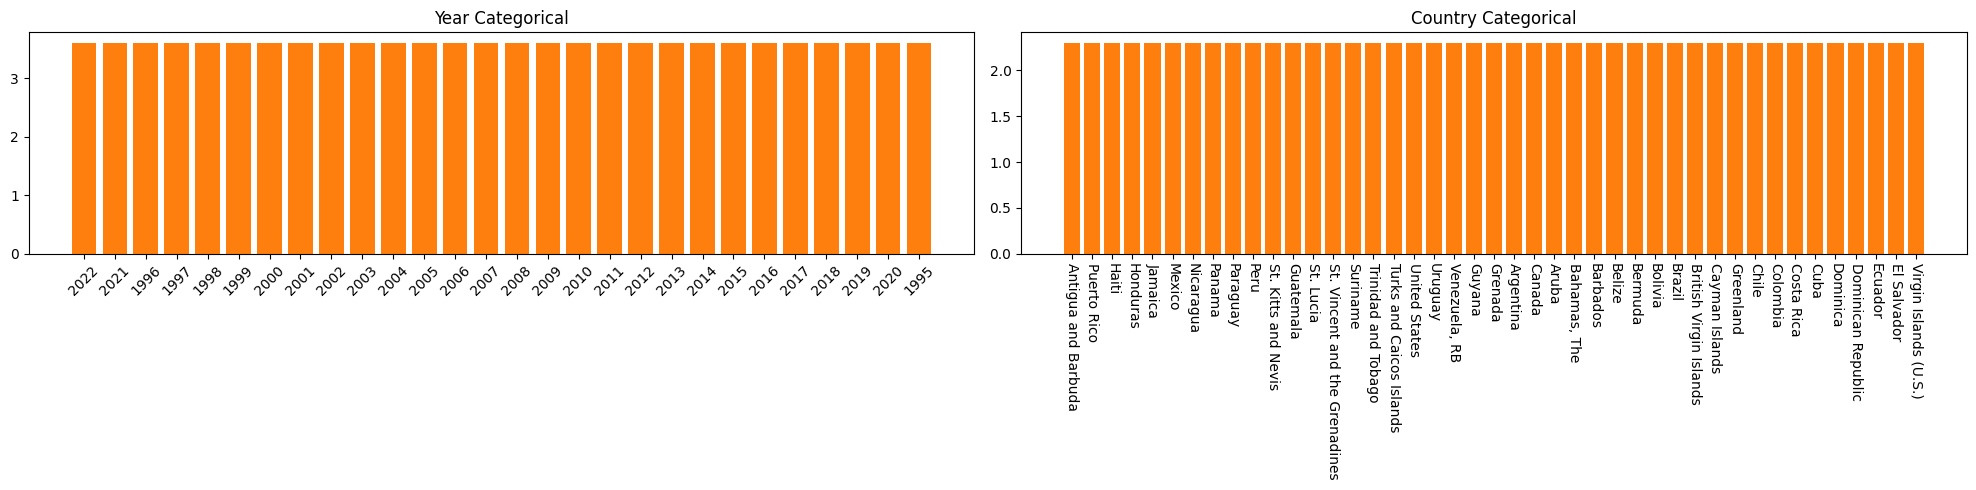

In [174]:
# YOUR CODE HERE (Optional)
# You can use Matplotlib to visualize this table for more intuitive
Year = cat_col_info_df.iloc[2][0]
Country = cat_col_info_df.iloc[2][1]
nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize =(20,5)) 
ax[0].bar(Year.keys(),Year.values())
ax[0].bar(Year.keys(),Year.values())
ax[0].set_xticklabels(Year.keys(), rotation=45)
ax[0].figure.tight_layout()
ax[0].set_title('Year Categorical')
ax[1].bar(Country.keys(),Country.values())
ax[1].bar(Country.keys(),Country.values())
ax[1].set_xticklabels(Country.keys(), rotation=180+90)
ax[1].figure.tight_layout()
ax[1].set_title('Country Categorical')

### Is the collected data reasonable? (0.5 points)

Chúng ta có một thắc mắc liệu rằng số liệu thu thập được có hợp lý hay không? Ví dụ như `Total Population` có bằng tổng của `Female Population` và `Male Population`?

In [175]:
def checking_population(df: pd.DataFrame) -> bool:
    """Checking for the reasonable of population information.

    Args:
        df (pd.DataFrame): _description_

    Returns:
        bool: _description_
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    return df["Total Population"].equals((df["Female Population"] + df["Male Population"]))

In [176]:
# TEST
checking_population(raw_df) == True

False

If the test result is false, we want to see how large with this different? If it is true, please skip this step.

In [177]:
sum(raw_df["Total Population"] - (raw_df["Female Population"] + raw_df["Male Population"]))

2.0

Let's replace column `Female Population` with the result of difference of `Total Population` and `Male Population` or otherwise.

In [178]:
raw_df["Female Population"] = raw_df["Total Population"] - raw_df["Male Population"]

In [179]:
# TEST
checking_population(raw_df) == True

True

**Can you check more cases for the reasonable of raw data?**

In [ ]:
# YOUR CODE HERE (Optional)

### Save your processed data (0.25 points)

In [180]:
print(f"Total number of features: {raw_df.shape[1]}")
raw_df.dtypes

Total number of features: 26


Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

In [181]:
# YOUR CODE HERE
# You can set the saved name in a pattern like, studentID_<your continent>_processed.csv
studentID = 21127635
your_continent = "americas"
save_name = "_".join([str(studentID), str(your_continent)]) + "_processed.csv"
raw_df.to_csv("../data/processed/" + save_name, index=False)

**Congrats, if you complete this notebook, you will get 4.00/10.00 :D**